In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("/content/BostonHousing.csv")

In [106]:
df.shape

(506, 14)

In [107]:
df['rm'].fillna(df['rm'].median(), inplace=True)

In [108]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [109]:
std = StandardScaler().fit_transform(df)

In [110]:
df= pd.DataFrame(std, columns=df.columns)   #Note down
x = df.drop('medv', axis=1)
y = df['medv']

In [111]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [112]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.415455,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.195904,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.285105,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.018507,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.230930,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [113]:
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size= .7, random_state = 1)

In [114]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
13,-0.347230,-0.487722,-0.437258,-0.272599,-0.144217,-0.477006,-0.240919,0.433754,-0.637962,-0.601276,1.176466,0.441052,-0.615792
61,-0.400535,0.585267,-0.876445,-0.272599,-0.878475,-0.452770,0.882795,1.437258,-0.178120,-0.737880,0.575395,0.234703,0.250482
377,0.722674,-0.487722,1.015999,-0.272599,1.004680,0.727673,1.074822,-1.158495,1.661245,1.530926,0.806576,0.441052,1.203663
39,-0.417302,2.731245,-1.194528,-0.272599,-1.094434,0.443968,-1.663342,0.763470,-0.752922,-0.927937,-0.071913,0.427127,-1.168077
365,0.109664,-0.487722,1.015999,-0.272599,1.410682,-3.881472,0.687212,-1.037181,1.661245,1.530926,0.806576,-0.021644,-0.775590


In [115]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [116]:
lr.score(x_train, y_train)

0.7097819196496262

In [117]:
lr.score(x_test, y_test)

0.7829642630380761

In [118]:
y_pred = lr.predict(x_test)

In [119]:
y_pred

array([ 1.0713591 ,  0.58904975, -0.50797032, -0.09204466, -0.3872315 ,
       -0.27504305,  1.09793803, -0.5070471 ,  0.24093094,  0.45959206,
        0.51521638,  0.6636126 , -0.15016447,  0.50499279,  0.08730216,
       -0.16195179, -0.59244921,  1.62568642,  0.88993197, -1.53007484,
       -0.18200552, -0.68036435,  0.27403451,  0.24760903,  0.9965651 ,
       -1.25653445, -0.97914889, -0.64723862,  1.44847113, -0.85108123,
       -0.15522291, -0.93303846,  2.22520584, -0.51409107, -0.09161944,
       -0.22946171, -0.56063146,  0.46621009, -1.35052769, -0.27779498,
        0.1797006 , -0.16363948,  0.74610891, -0.67540234, -0.34355182,
       -0.88261898,  1.84704659, -0.47232273,  0.42044605, -0.23300946,
        0.2759465 ,  0.20700583,  0.25797591,  0.48411849, -1.91784241,
        0.16450287, -1.2935233 ,  0.48348593, -0.64123571,  1.38737213,
       -0.33092207,  0.52658126, -0.65145367, -0.37479751, -1.25069976,
        1.03128187,  1.47934475, -0.10793495,  0.26772033,  0.32

In [120]:
from sklearn.metrics import r2_score


In [121]:
R2_score =r2_score(y_pred, y_test)
R2_score

0.6488315993777799

In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [123]:
ridge_reg = Ridge()

In [124]:
ridge_reg

Ridge()

In [125]:
import numpy as np
params={"alpha": np.logspace(.1, 10, 1000)}
params

{'alpha': array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
        1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
        1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
        1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
        1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1.94217468e+00,
        1.98700151e+00, 2.03286298e+00, 2.07978297e+00, 2.12778591e+00,
        2.17689678e+00, 2.22714118e+00, 2.27854525e+00, 2.33113577e+00,
        2.38494011e+00, 2.43998630e+00, 2.49630299e+00, 2.55391952e+00,
        2.61286588e+00, 2.67317276e+00, 2.73487157e+00, 2.79799444e+00,
        2.86257423e+00, 2.92864456e+00, 2.99623986e+00, 3.06539530e+00,
        3.13614689e+00, 3.20853149e+00, 3.28258678e+00, 3.35835132e+00,
        3.43586456e+00, 3.51516687e+00, 3.59629953e+00, 3.67930479e+00,
        3.76422587e+00, 3.85110700e+00, 3.93999341e+00, 4.03093138e+00,
        4.12396827e+00, 4.21915252e+00, 4.31653369e+00,

In [126]:
ridgecv = GridSearchCV(ridge_reg,params,scoring = "neg_mean_squared_error",cv = 5)

In [127]:
ridgecv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
       1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
       1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
       1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
       1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1....
       5.91659813e+09, 6.05315761e+09, 6.19286898e+09, 6.33580499e+09,
       6.48204007e+09, 6.63165037e+09, 6.78471378e+09, 6.94131002e+09,
       7.10152060e+09, 7.26542897e+09, 7.43312046e+09, 7.60468240e+09,
       7.78020412e+09, 7.95977700e+09, 8.14349456e+09, 8.33145246e+09,
       8.52374857e+09, 8.72048301e+09, 8.92175824e+09, 9.12767904e+09,
       9.33835265e+09, 9.55388876e+09, 9.77439960e+09, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

In [128]:
ridgecv.best_params_

{'alpha': np.float64(6.508988639039736)}

In [129]:
ridgecv.best_score_

np.float64(-0.307817568965756)

In [130]:
ridge_pred = ridgecv.predict(x_test)
ridge_pred

array([ 0.99644846,  0.59699881, -0.49722201, -0.05834699, -0.40770889,
       -0.25746647,  1.02368835, -0.48619603,  0.21579929,  0.46294401,
        0.47639649,  0.68743205, -0.12969421,  0.47553642,  0.07278662,
       -0.20807212, -0.59084879,  1.60736856,  0.87332198, -1.47606837,
       -0.18131541, -0.64692179,  0.27449584,  0.2549256 ,  0.96613784,
       -1.25689038, -0.94907984, -0.55726665,  1.4236944 , -0.86771173,
       -0.06402408, -0.90242078,  2.13782377, -0.50858218, -0.00796876,
       -0.20504155, -0.55729164,  0.49483642, -1.38604097, -0.29575285,
        0.25676665, -0.1385057 ,  0.71157836, -0.698432  , -0.36722633,
       -0.86364873,  1.83720809, -0.48600075,  0.39485486, -0.22108811,
        0.25793121,  0.20761084,  0.27488043,  0.46077333, -1.81586326,
        0.15527541, -1.28245393,  0.46639131, -0.61217383,  1.37623244,
       -0.3373177 ,  0.52416416, -0.66869397, -0.40847952, -1.227679  ,
        1.00068472,  1.46864303,  0.01388322,  0.25069126,  0.30

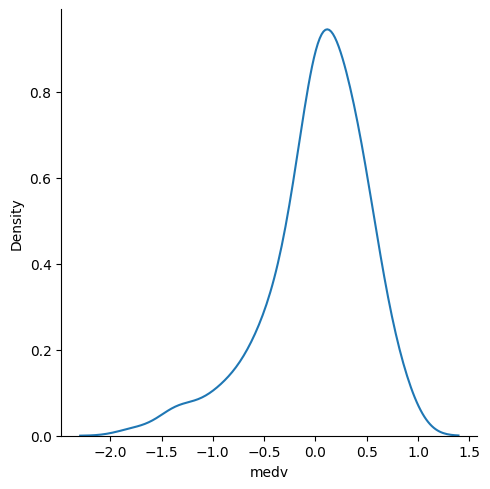

In [131]:
import seaborn as sns
sns.displot(ridge_pred-y_test, kind= "kde")

In [132]:
R2_score =r2_score(ridge_pred, y_test)
R2_score

0.6339236745786948

In [133]:
from sklearn.linear_model import Lasso

In [134]:
lasso =Lasso()

In [135]:
params={"alpha": np.logspace(.1, 10, 1000)}
lassocv = GridSearchCV(ridge_reg,params,scoring = "neg_mean_squared_error",cv = 5)
lassocv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.25892541e+00, 1.28798234e+00, 1.31770993e+00, 1.34812366e+00,
       1.37923935e+00, 1.41107322e+00, 1.44364184e+00, 1.47696216e+00,
       1.51105155e+00, 1.54592774e+00, 1.58160890e+00, 1.61811360e+00,
       1.65546087e+00, 1.69367013e+00, 1.73276130e+00, 1.77275471e+00,
       1.81367121e+00, 1.85553209e+00, 1.89835914e+00, 1....
       5.91659813e+09, 6.05315761e+09, 6.19286898e+09, 6.33580499e+09,
       6.48204007e+09, 6.63165037e+09, 6.78471378e+09, 6.94131002e+09,
       7.10152060e+09, 7.26542897e+09, 7.43312046e+09, 7.60468240e+09,
       7.78020412e+09, 7.95977700e+09, 8.14349456e+09, 8.33145246e+09,
       8.52374857e+09, 8.72048301e+09, 8.92175824e+09, 9.12767904e+09,
       9.33835265e+09, 9.55388876e+09, 9.77439960e+09, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

In [136]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': np.float64(6.508988639039736)}
-0.307817568965756


In [137]:
lasso_pred = lassocv.predict(x_test)
lasso_pred

array([ 0.99644846,  0.59699881, -0.49722201, -0.05834699, -0.40770889,
       -0.25746647,  1.02368835, -0.48619603,  0.21579929,  0.46294401,
        0.47639649,  0.68743205, -0.12969421,  0.47553642,  0.07278662,
       -0.20807212, -0.59084879,  1.60736856,  0.87332198, -1.47606837,
       -0.18131541, -0.64692179,  0.27449584,  0.2549256 ,  0.96613784,
       -1.25689038, -0.94907984, -0.55726665,  1.4236944 , -0.86771173,
       -0.06402408, -0.90242078,  2.13782377, -0.50858218, -0.00796876,
       -0.20504155, -0.55729164,  0.49483642, -1.38604097, -0.29575285,
        0.25676665, -0.1385057 ,  0.71157836, -0.698432  , -0.36722633,
       -0.86364873,  1.83720809, -0.48600075,  0.39485486, -0.22108811,
        0.25793121,  0.20761084,  0.27488043,  0.46077333, -1.81586326,
        0.15527541, -1.28245393,  0.46639131, -0.61217383,  1.37623244,
       -0.3373177 ,  0.52416416, -0.66869397, -0.40847952, -1.227679  ,
        1.00068472,  1.46864303,  0.01388322,  0.25069126,  0.30

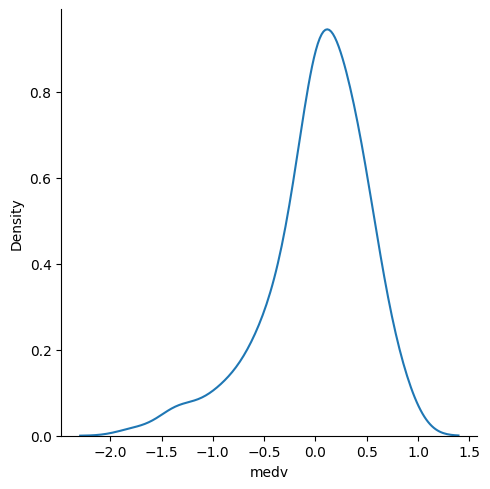

In [138]:
sns.displot(lasso_pred-y_test, kind = "kde")